In [25]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, validation_curve, learning_curve
import warnings
import time
warnings.filterwarnings('ignore')
from random import randint
import math

In [26]:
fit_labels = ['FourPeak', 'ContinuousPeaks', 'Knapsack']
state = [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
l = 110
state = np.array(state)
weights = [48, 8, 34, 13, 12, 23, 21, 45, 17, 26, 12, 28, 25, 21, 26, 40, 8, 11, 21, 13, 25, 17, 46, 29, 19, 3, 12, 7, 42, 29, 30, 14, 24, 9, 48, 3, 22, 49, 9, 44, 14, 37, 37, 40, 41, 35, 12, 46, 38, 41, 19, 18, 7, 29, 18, 25, 37, 44, 4, 25, 19, 13, 25, 12, 6, 13, 2, 30, 37, 15, 3, 33, 36, 47, 16, 23, 47, 34, 37, 4, 49, 32, 48, 36, 15, 48, 3, 37, 39, 11, 46, 35, 23, 46, 41, 49, 24, 7, 47, 6, 8, 22, 28, 32, 49, 8, 45, 31, 3, 46, 20, 46, 30, 8, 41, 42, 11, 38, 13, 4, 11, 49, 17, 18, 22, 46, 5, 10, 17, 24]
values = [4, 6, 5, 9, 4, 8, 5, 1, 1, 6, 6, 7, 4, 4, 1, 8, 8, 6, 8, 8, 1, 6, 2, 6, 5, 7, 9, 8, 9, 4, 8, 1, 3, 2, 2, 4, 5, 3, 7, 1, 1, 1, 3, 6, 2, 4, 7, 7, 9, 4, 9, 7, 2, 5, 9, 3, 1, 1, 2, 2, 5, 6, 1, 6, 6, 6, 9, 1, 7, 5, 3, 2, 9, 4, 1, 4, 8, 1, 4, 8, 4, 6, 8, 2, 4, 3, 2, 6, 2, 6, 1, 5, 3, 2, 8, 2, 4, 2, 8, 1, 6, 6, 1, 2, 7, 4, 9, 8, 2, 6, 5, 6, 4, 7, 2, 8, 7, 9, 6, 1, 8, 6, 9, 7, 7, 1, 5, 9, 3, 8]


In [27]:
def discrete(l, fit, mx, val):
    problem = mlrose_hiive.DiscreteOpt(length = l, fitness_fn = fit, maximize = mx, max_val = val)
    return problem


def genetic(problem, mut, size):
    opt = mlrose_hiive.genetic_alg(problem, pop_size=size, 
                                                        mutation_prob=mut, max_attempts=1000, max_iters=4000, curve=True, random_state=10)
    return opt

In [28]:
def fourpeak(state, l, mx, val, mut, size):
    fitness = mlrose_hiive.FourPeaks(t_pct=0.15)
    problem = discrete(l, fitness, mx, val)
    
    
    
    
    start = time.time()
    ga = genetic(problem, mut, size)
    ga_t.append(time.time()-start)
    ga_fit.append(ga[1])
    
   

In [29]:
def contpeak(state, l, mx, val, mut, size):
    fitness = mlrose_hiive.ContinuousPeaks(t_pct=0.15)
    problem = discrete(l, fitness, mx, val)
    
    start = time.time()
   
    
    start = time.time()
    ga = genetic(problem, mut,  size)
    ga_t2.append(time.time()-start)
    ga_fit2.append(ga[1])
    
   

In [30]:
def ksack(state, l, mx, val, mut, weights, values, size):
    
    
    
    fitness = mlrose_hiive.Knapsack(weights, values, 0.6)
    problem = discrete(l, fitness, mx, val)
    
    
    
    start = time.time()
    ga = genetic(problem, mut, size)
    ga_t3.append(time.time()-start)
    ga_fit3.append(ga[1])
    
  


In [31]:
def plotting(labels, data, rang, x, y, title, file):
    plt.figure()
    for label, arr in zip(labels, data):
        plt.plot(rang, arr, label=label)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(file, dpi = 1200)

In [32]:
ga_fit = []


ga_t = []


ga_fit2 = []

ga_t2 = []


ga_fit3 = []


ga_t3 = []

for i in [ 40, 80, 160, 320, 640]:
    fourpeak(state, l, True, 2, 0.1, i)
for i in [ 40, 80, 160, 320, 640]:
    contpeak(state, l, True, 2, 0.1, i)
for i in [ 40, 80, 160, 320, 640]:
    ksack(state, l, True, 2, 0.1, weights[:l], values[:l], i)




In [33]:
ga_fit, ga_fit2, ga_fit3

([110.0, 110.0, 202.0, 110.0, 110.0],
 [110.0, 110.0, 199.0, 202.0, 202.0],
 [455.0, 453.0, 456.0, 455.0, 456.0])

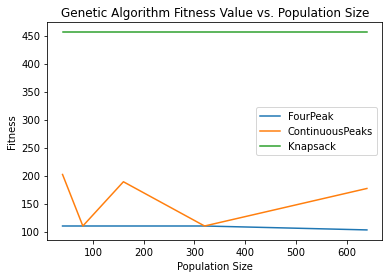

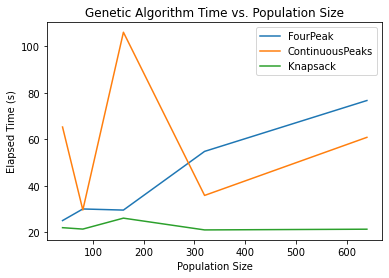

In [39]:
plotting(fit_labels, [ga_fit, ga_fit2, ga_fit3],np.array([ 40, 80, 160, 320, 640]), 
         'Population Size', 'Fitness', 'Genetic Algorithm Fitness Value vs. Population Size', 'fp_fit_gapop.png')
plotting(fit_labels, [ga_t, ga_t2, ga_t3],np.array([ 40, 80, 160, 320, 640]), 
         'Population Size', 'Elapsed Time (s)', 'Genetic Algorithm Time vs. Population Size', 'fp_time_gapop.png')



In [35]:
ga_fit = []


ga_t = []


ga_fit2 = []

ga_t2 = []


ga_fit3 = []


ga_t3 = []

for i in [ 0.5, 0.1, 0.05, 0.01, 0.005]:
    fourpeak(state, l, True, 2, i, 300)
for i in [ 0.5, 0.1, 0.05, 0.01, 0.005]:
    contpeak(state, l, True, 2, i, 300)
for i in [ 0.5, 0.1, 0.05, 0.01, 0.005]:
    ksack(state, l, True, 2, i, weights[:l], values[:l], 300)


In [36]:
test = [math.log(0.5), math.log(0.1), math.log(0.05), math.log(0.01), math.log(0.005)]

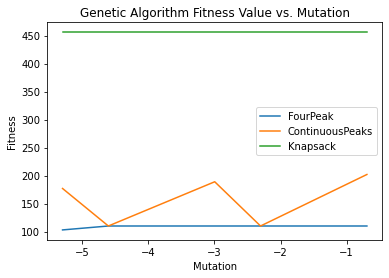

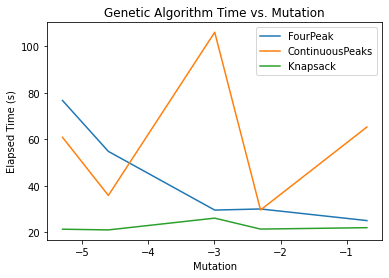

In [40]:
plotting(fit_labels, [ga_fit, ga_fit2, ga_fit3],np.array(test), 
         'Mutation', 'Fitness', 'Genetic Algorithm Fitness Value vs. Mutation', 'fp_fit_mut.png')
plotting(fit_labels, [ga_t, ga_t2, ga_t3],np.array(test), 
         'Mutation', 'Elapsed Time (s)', 'Genetic Algorithm Time vs. Mutation', 'fp_time_mut.png')

In [38]:
ga_fit, ga_fit2, ga_fit3

([110.0, 110.0, 110.0, 110.0, 103.0],
 [202.0, 110.0, 189.0, 110.0, 177.0],
 [456.0, 456.0, 456.0, 456.0, 456.0])